## IMPORTS AND UTILITIES

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from ydata_profiling import ProfileReport

In [2]:
# import of the dataset
df = pd.read_csv("Comune-di-Milano-Esercizi-di-vicinato-in-sede-fissa-dirty.csv",sep=';',encoding='unicode_escape')

In [3]:
# show first 10 records just for a visualization
df.head(10)

,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
0,NaN,NaN,CSO ITALIA N. 34 (z.d. 1),CSO,ITALIA,34,526,1.0,speciale panificatori,0.0,NaN,NaN,0.0
1,NaN,NaN,CSO LODI N. 104 (z.d. 4),CSO,LODI,104,4068,4.0,NaN,16.0,5.0,NaN,21.0
2,NaN,NaN,CSO LODI N. 26 (z.d. 5),CSO,LODI,26,4068,5.0,speciale panificatori,0.0,NaN,NaN,0.0
3,NaN,NaN,CSO SEMPIONE N. 41 (z.d. 6),CSO,SEMPIONE,41,7137,8.0,NaN,120.0,NaN,NaN,120.0
4,NaN,NaN,LGO SCALABRINI GIOVANNI BATTISTA N. 2 (z.d. 6),LGO,SCALABRINI GIOVANNI BATTISTA,2,5392,6.0,NaN,0.0,NaN,NaN,0.0
5,NaN,NaN,PLE STAZIONE DI PORTA GENOVA N. 2 (z.d. 6),PLE,STAZIONE DI PORTA GENOVA,2,5120,6.0,speciale panificatori,36.0,NaN,NaN,36.0
6,NaN,NaN,PZA ASPROMONTE N. 1 ang.lulli-7.4.08 tr.set.ag...,PZA,ASPROMONTE,1,2246,3.0,prod. agricolo alim/non alim,3.0,NaN,NaN,40.0
7,NaN,NaN,PZA BONOMELLI GEREMIA N. 10 (z.d. 5),PZA,BONOMELLI GEREMIA,10,4150,5.0,ESERCIZIO DI VICINATO,14.0,143.0,NaN,157.0
8,NaN,NaN,PZA OBERDAN GUGLIELMO N. 2 (z.d. 1),PZA,OBERDAN GUGLIELMO,2,2108,1.0,COMMERCIO AL DETTAGLIO,190.0,100.0,NaN,290.0
9,NaN,NaN,PZA SANTA MARIA DELLE GRAZIE N. 1 comm. elettr...,PZA,SANTA MARIA DELLE GRAZIE,1,6164,1.0,NaN,0.0,NaN,NaN,0.0


## DATA PROFILING AND DQ ASSESMENT

BASIC PROFILING OPERATIONS

In [4]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print(f"Num of rows: {n_rows}\nNum of columns: {n_cols}")

Num of rows: 24136
Num of columns: 13


In [5]:
print("COLUMNS OF THE DATASET:")
for col in df.columns:
    print(f"{col}")

COLUMNS OF THE DATASET:
Settore Merceologico
Insegna
Ubicazione
Tipo via
Via
Civico
Codice via
ZD
Settore Storico Cf Preval
Superficie Vendita
Superficie Altri Usi
Superficie Tabelle Speciali
Superficie Totale


In [6]:
# show for each column the type of its elements
df.dtypes

Settore Merceologico            object
Insegna                         object
Ubicazione                      object
Tipo via                        object
Via                             object
Civico                          object
Codice via                      object
ZD                             float64
Settore Storico Cf Preval       object
Superficie Vendita             float64
Superficie Altri Usi           float64
Superficie Tabelle Speciali    float64
Superficie Totale              float64
dtype: object

In [7]:
# separate numerical variables from categorical
num = df[df.select_dtypes(include=['float64']).columns] 
cat = df[df.select_dtypes(include=['object']).columns]

Histogram for ZD:


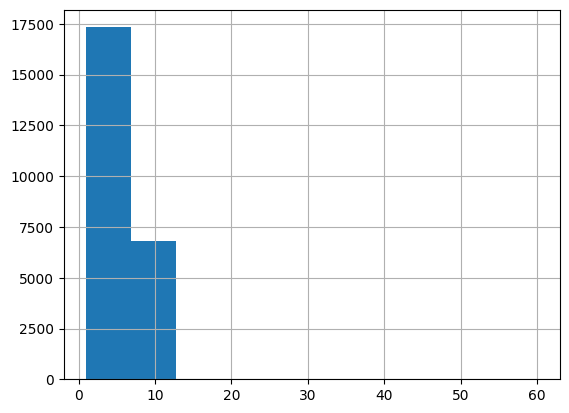

Histogram for Superficie Vendita:


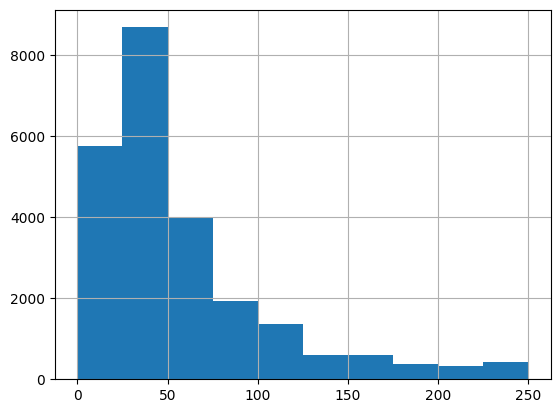

Histogram for Superficie Altri Usi:


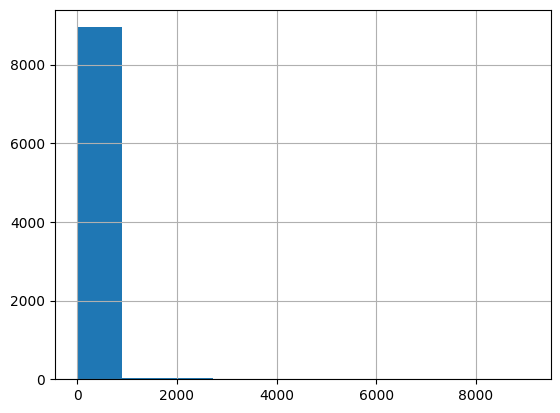

Histogram for Superficie Tabelle Speciali:


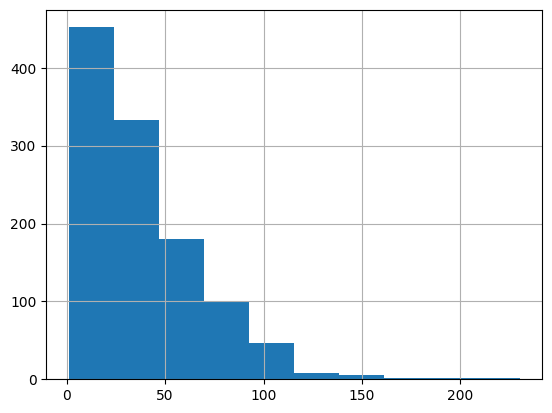

Histogram for Superficie Totale:


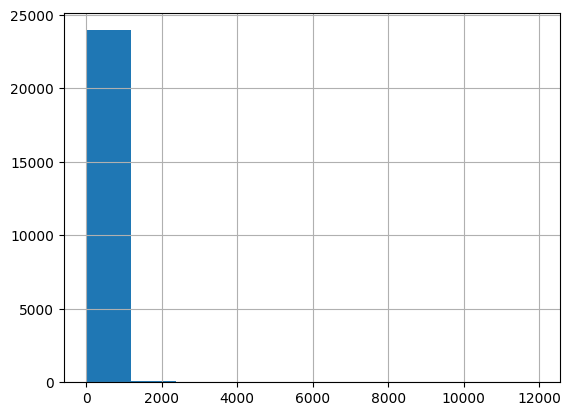

In [8]:
# look at values distributions
for col in num:
    print("Histogram for "+col+":")
    df[col].hist()
    plt.show()

In [9]:
# extract basic statistics for the numerical variables
stats = num.describe()
stats

,ZD,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
count,24134.000000,24106.000000,9038.000000,1127.000000,24100.000000
mean,4.339935,56.762715,67.852069,37.138421,98.350747
std,2.791555,49.281531,280.890686,29.824418,266.692535
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,25.000000,10.000000,13.000000,35.000000
50%,4.000000,40.000000,21.000000,30.000000,55.000000
75%,7.000000,70.000000,50.000000,52.500000,100.000000
max,60.000000,250.000000,9056.000000,230.000000,11942.000000


In [10]:
p_values = pd.DataFrame(index=num.columns, columns=num.columns)

nnum = num.dropna()
for c1 in num.columns:
    for c2 in num.columns:
        if c1 == c2:
            p_values.loc[c1,c2] = 0.0
        else:
            _, p_value = spearmanr(nnum[c1], nnum[c2])
            p_values.loc[c1, c2] = p_value

p_values

,ZD,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
ZD,0.0,0.752213,0.180803,0.613539,0.04012
Superficie Vendita,0.752213,0.0,0.000084,0.0,0.0
Superficie Altri Usi,0.180803,0.000084,0.0,0.000702,0.0
Superficie Tabelle Speciali,0.613539,0.0,0.000702,0.0,0.0
Superficie Totale,0.04012,0.0,0.0,0.0,0.0


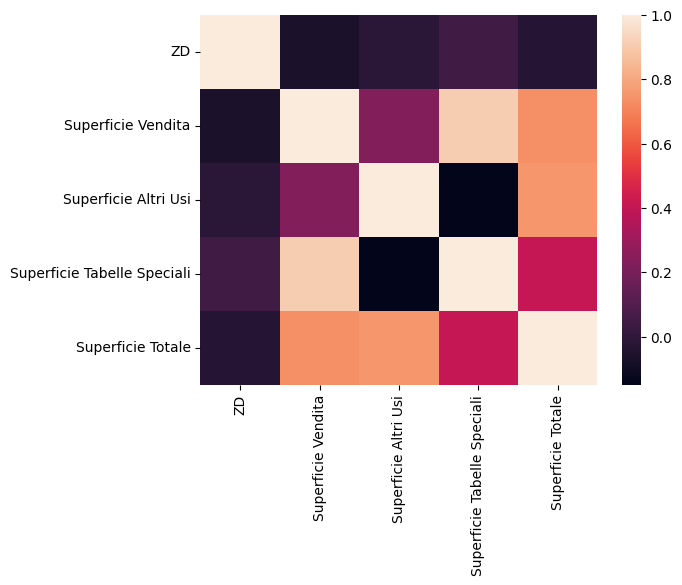

In [11]:
corr = num.corr(method='spearman')
sns.heatmap(corr)
plt.show()

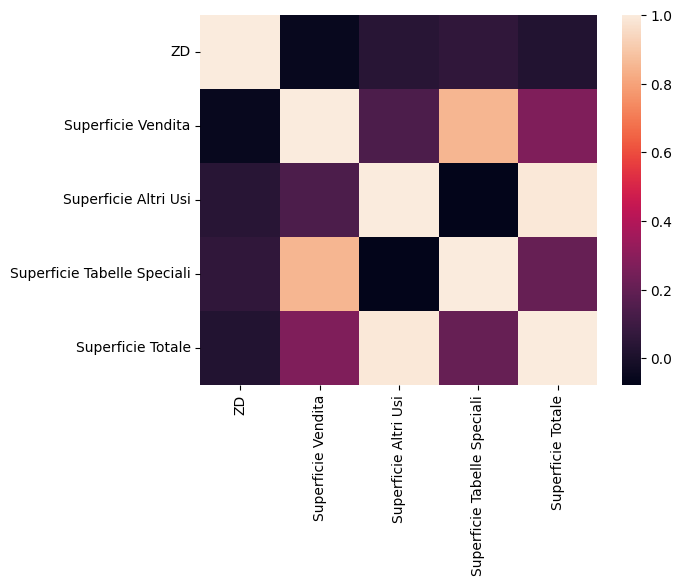

In [12]:
# look for correlations 
# TODO try other methods other than Pearson test
corr = num.corr(method='pearson')
sns.heatmap(corr)
plt.show()

SINGLE COLUMN ANALYSIS

For each column, we compute:

- Missing: number of missing values
- Actual: count of the number of records with an actual value (*i.e.,* not-null).
- Cardinality: count of the number of distinct actual values.
- Uniqueness: percentage calculated as Cardinality divided by the total number of records.
- Distinctness: percentage calculated as Cardinality divided by Actual.
- Constancy: "how frequent" is the most frequent value (can help spot standard)

In [13]:
num['ZD'].value_counts()

ZD
1.0     5732
3.0     3131
4.0     2398
9.0     2307
2.0     2297
8.0     2271
7.0     2221
6.0     2011
5.0     1765
60.0       1
Name: count, dtype: int64

In [14]:
# perform single column analysis for each column
sc_analysis = pd.DataFrame(columns=df.columns,index=['Missing','Actual','Cardinality','Uniqueness','Distinctness','Constancy','Completeness'])

for col in df.columns:
    cardinality = df[col].nunique() # number of unique values
    actual = df[col].notnull().sum() # number of not null values
    nnull = df[col].isnull().sum() # number of null values
    uniqueness = cardinality/n_rows
    distinctness = cardinality/actual
    mode = df[col].mode()[0]
    constancy = df[col].value_counts()[mode] / n_rows

    sc_analysis[col]['Missing'] = nnull
    sc_analysis[col]['Cardinality'] = cardinality
    sc_analysis[col]['Actual'] = actual
    sc_analysis[col]['Uniqueness'] = uniqueness
    sc_analysis[col]['Distinctness'] = distinctness
    sc_analysis[col]['Constancy'] = constancy
    sc_analysis[col]['Completeness'] = actual / n_rows

sc_analysis


,Settore Merceologico,Insegna,Ubicazione,Tipo via,Via,Civico,Codice via,ZD,Settore Storico Cf Preval,Superficie Vendita,Superficie Altri Usi,Superficie Tabelle Speciali,Superficie Totale
Missing,105,17147,1,2,1,650,2,2,33,30,15098,23009,36
Actual,24031,6989,24135,24134,24135,23486,24134,24134,24103,24106,9038,1127,24100
Cardinality,56,5583,16907,20,2331,386,2348,10,2228,250,438,117,642
Uniqueness,0.00232,0.231314,0.700489,0.000829,0.096578,0.015993,0.097282,0.000414,0.09231,0.010358,0.018147,0.004848,0.026599
Distinctness,0.00233,0.798827,0.700518,0.000829,0.096582,0.016435,0.09729,0.000414,0.092437,0.010371,0.048462,0.103815,0.026639
Constancy,0.682342,0.006878,0.000953,0.720045,0.01214,0.062314,0.01214,0.237488,0.089617,0.051583,0.024196,0.004267,0.042551
Completeness,0.99565,0.289567,0.999959,0.999917,0.999959,0.973069,0.999917,0.999917,0.998633,0.998757,0.374461,0.046694,0.998508


## DEPENDENCY DISCOVERY

In [17]:
df['Settore Merceologico'].value_counts()

Settore Merceologico
non alimentare                                                                      16469
alimentare                                                                           2972
Non Alimentare                                                                       1346
alimentare;non alimentare                                                            1130
tabella speciale monopolio                                                            737
Alimentare                                                                            351
tabella speciale farmacie                                                             275
Alimentare;Non Alimentare                                                             143
tabella speciale carburanti                                                           135
non alimentare;tabella speciale monopolio                                             122
non alimentare;tabella speciale farmacie                                       

In [18]:
import efficient_apriori


def rules(store_data, support, confidence):

    #every tuple is a record, the index of the column is also stored
    records = []
    for i in range(0, len(store_data)):
        records.append([(str(store_data.values[i,j]), j) for j in range(0, len(store_data.columns))])

    #find the rules using apriori algorithm
    itemset, rules = efficient_apriori.apriori(records, min_support=support, min_confidence=confidence)
    print(rules)
    return rules

In [19]:
df.columns

Index(['Settore Merceologico', 'Insegna', 'Ubicazione', 'Tipo via', 'Via',
       'Civico', 'Codice via', 'ZD', 'Settore Storico Cf Preval',
       'Superficie Vendita', 'Superficie Altri Usi',
       'Superficie Tabelle Speciali', 'Superficie Totale'],
      dtype='object')

In [20]:
transactions = df[['Settore Merceologico','Settore Storico Cf Preval']]
rules(transactions,0.01,0.01)

[{('Non Alimentare', 0)} -> {('COMMERCIO AL DETTAGLIO', 1)}, {('COMMERCIO AL DETTAGLIO', 1)} -> {('Non Alimentare', 0)}, {('non alimentare', 0)} -> {('abbigliamento', 1)}, {('abbigliamento', 1)} -> {('non alimentare', 0)}, {('non alimentare', 0)} -> {('accessori e ricambi auto-moto', 1)}, {('accessori e ricambi auto-moto', 1)} -> {('non alimentare', 0)}, {('macelleria', 1)} -> {('alimentare', 0)}, {('alimentare', 0)} -> {('macelleria', 1)}, {('panetteria', 1)} -> {('alimentare', 0)}, {('alimentare', 0)} -> {('panetteria', 1)}, {('panificio (con forno)', 1)} -> {('alimentare', 0)}, {('alimentare', 0)} -> {('panificio (con forno)', 1)}, {('non alimentare', 0)} -> {("antichita' e oggetti d'arte,an", 1)}, {("antichita' e oggetti d'arte,an", 1)} -> {('non alimentare', 0)}, {('non alimentare', 0)} -> {('articoli regalo', 1)}, {('articoli regalo', 1)} -> {('non alimentare', 0)}, {('non alimentare', 0)} -> {('autoveicoli', 1)}, {('autoveicoli', 1)} -> {('non alimentare', 0)}, {('tabella specia

[{('Non Alimentare', 0)} -> {('COMMERCIO AL DETTAGLIO', 1)},
 {('COMMERCIO AL DETTAGLIO', 1)} -> {('Non Alimentare', 0)},
 {('non alimentare', 0)} -> {('abbigliamento', 1)},
 {('abbigliamento', 1)} -> {('non alimentare', 0)},
 {('non alimentare', 0)} -> {('accessori e ricambi auto-moto', 1)},
 {('accessori e ricambi auto-moto', 1)} -> {('non alimentare', 0)},
 {('macelleria', 1)} -> {('alimentare', 0)},
 {('alimentare', 0)} -> {('macelleria', 1)},
 {('panetteria', 1)} -> {('alimentare', 0)},
 {('alimentare', 0)} -> {('panetteria', 1)},
 {('panificio (con forno)', 1)} -> {('alimentare', 0)},
 {('alimentare', 0)} -> {('panificio (con forno)', 1)},
 {('non alimentare', 0)} -> {("antichita' e oggetti d'arte,an", 1)},
 {("antichita' e oggetti d'arte,an", 1)} -> {('non alimentare', 0)},
 {('non alimentare', 0)} -> {('articoli regalo', 1)},
 {('articoli regalo', 1)} -> {('non alimentare', 0)},
 {('non alimentare', 0)} -> {('autoveicoli', 1)},
 {('autoveicoli', 1)} -> {('non alimentare', 0)},


In [26]:
# import tane

# tane.compute()

## DQ ASSESMENT

The 4 main dimensions to evaluate are:
- completeness
- accuracy (can't evaluate since there's no ground truth)
- timeliness
- consistency

**TODO** every interesting and meaningful measure can be added

The following are the measures computed by the T.A. for a similar case study

In [17]:
# put as many measures you can compute and that are reasonable
for col in df.columns:
    print("DQ Assessment for "+col+":")

    DISTINCT = df[col].nunique()
    COUNT = df[col].count()
    ROWS = len(df[col])
    UNIQUENESS = DISTINCT / ROWS
    print("UNIQUENESS: ", UNIQUENESS)

    DISTINCTNESS = DISTINCT / COUNT
    print("DISTINCTNESS: ", DISTINCTNESS)

    MAX_COUNTS = max(df[col].value_counts())
    CONSTANCY = MAX_COUNTS / COUNT
    print("CONSTANCY: ", CONSTANCY)

    NOT_NULL = df.count().sum()
    NULL = df.isnull().sum().sum()
    TOT = df.shape[0]*df.shape[1]
    COMPLETENESS = NOT_NULL / TOT
    print("COMPLETENESS: ", COMPLETENESS)

    # accuracy is useless since we don't have the ground truth
    print("\n\n")

DQ Assessment for Settore Merceologico:
UNIQUENESS:  0.002320185614849188
DISTINCTNESS:  0.002330323332362365
CONSTANCY:  0.6853231242977821
COMPLETENESS:  0.8211544835674766



DQ Assessment for Insegna:
UNIQUENESS:  0.23131421942326816
DISTINCTNESS:  0.7988267277149806
CONSTANCY:  0.02375160967234225
COMPLETENESS:  0.8211544835674766



DQ Assessment for Ubicazione:
UNIQUENESS:  0.7004888962545575
DISTINCTNESS:  0.7005179200331468
CONSTANCY:  0.0009529728609902631
COMPLETENESS:  0.8211544835674766



DQ Assessment for Tipo via:
UNIQUENESS:  0.0008286377195889957
DISTINCTNESS:  0.0008287063893262617
CONSTANCY:  0.7201044170050551
COMPLETENESS:  0.8211544835674766



DQ Assessment for Via:
UNIQUENESS:  0.09657772621809745
DISTINCTNESS:  0.09658172778123057
CONSTANCY:  0.012140045576962917
COMPLETENESS:  0.8211544835674766



DQ Assessment for Civico:
UNIQUENESS:  0.015992707988067616
DISTINCTNESS:  0.01643532317125096
CONSTANCY:  0.06403815038746487
COMPLETENESS:  0.8211544835674766




## DATA WRANGLING

## MISSING VALUES HANDLING

## OUTLIERS HANDLING

## DUPLICATES HANDLING

## PERFORMANCE ANALYSIS (optional)